# python import 

In [1]:
import os
import pandas as pd
import numpy as np
import lmfit
import glob
import platform
import json

from ipywidgets import interactive
from IPython.core.display import HTML
from IPython.display import display

import ipywidgets as widgets

import pprint

from PIL import Image

import matplotlib.pyplot as plt
%matplotlib notebook

# images size 

In [2]:
image_width = 9576
image_height = 6388
print(f"{image_height/2 =}")
print(f"number of pixels: {image_width * image_height:_}")
print(f"original image is 122MB")

image_height/2 =3194.0
number of pixels: 61_171_488
original image is 122MB


# pixel size 

this has been calculated by the notebook [calculation of pixel size](calculation_of_pixel_size.ipynb)

In [3]:
pixel_size = 51.010e-3  # mm   

# theoretical center position 

In [4]:
theoretical_center_x_px = 4869
theoretical_center_y_px = 3216

# beam size 

In [5]:
beam_diameter_mm = 22.2157e1 # mm
beam_diameter_px = np.round(beam_diameter_mm / pixel_size)
print(f"{beam_diameter_px = }")
beam_radius_px = beam_diameter_px / 2
beam_radius_mm = beam_diameter_mm / 2
print(f"{beam_radius_px = } px")
print(f"{beam_radius_mm = } mm")

beam_diameter_px = 4355.0
beam_radius_px = 2177.5 px
beam_radius_mm = 111.0785 mm


# User input 

Define the **base folder (base_folder)** from where all the data set will be located. 

For example, if you are working on the analysis machine:

*top_folder* = "/SNS/VENUS/IPTS-31716/shared/2023-06-12-analysis/"


In [6]:
if platform.node() == "mac113775":
    top_folder = "/Volumes/JeanHardDrive/SNS/VENUS/IPTS-31716/2023-06-12-analysis/"
elif platform.system() == "Linux":
    top_folder = "/SNS/VENUS/IPTS-31716/shared/2023-06-12-analysis"    
else:
    top_folder = "/Users/j35/SNS/VENUS/IPTS-31716-first_experiment_ever"
    
base_folder = top_folder + "/profiles/beam_center_for_all_apertures"
assert os.path.exists(base_folder)  # making sure the base folder exists

# Loading all the images 

In [7]:
base_folder = top_folder + "/median_data/"
list_images_to_load = glob.glob(os.path.join(base_folder, '*.tif'))
assert len(list_images_to_load) > 0

## DEBUGGING ONLY
list_images_to_load = list_images_to_load[-8:]

progress_bar = widgets.IntProgress()
progress_bar.max = len(list_images_to_load)
display(progress_bar)

images = {}
for _image_filename in list_images_to_load:
    _key = os.path.basename(_image_filename)
    image = np.asarray(Image.open(_image_filename))
    images[_key] = image
    progress_bar.value += 1
    
progress_bar.close()
print("All images have been loaded!")

IntProgress(value=0, max=8)

All images have been loaded!


# Selection of range of profiles 

In [8]:
roi_width = 3

def get_horizontal_profile(image=None, y=1):
    profile_region = image[y-1: y+1, :]
    return np.mean(profile_region, axis=0)    

def get_vertical_profile(image=None, x=1):
    profile_region = image[:, x-1: x+1]
    return np.mean(profile_region, axis=1)

In [9]:
print(f"list of input files:")
print(f"")
for _key in images.keys():
    print(f"{ _key}")

list of input files:

120deg_again_30s_frames_OB_median.tif
60deg_30s_frames_OB_median.tif
240deg_30s_frames_OB_median.tif
180deg_30s_frames_OB_median.tif
180deg_again_30s_frames_OB.tif
240deg_nbr2_30s_frames_OB.tif
60deg_nbr1_30s_frames_OB.tif
0deg_nbr2_30s_frames_OB.tif


In [10]:
## INPUT REQUESTED HERE
filename = "240deg_30s_frames_OB_median.tif"
assert filename in images.keys()

In [48]:
## INPUT REQUESTED HERE
y_range = [2000, 4000]
x_range = [4500, 6000]

x_borders = [2450, 7500]
y_borders = [1000, 5000]

vmin=0
vmax=5000

<IPython.core.display.Javascript object>


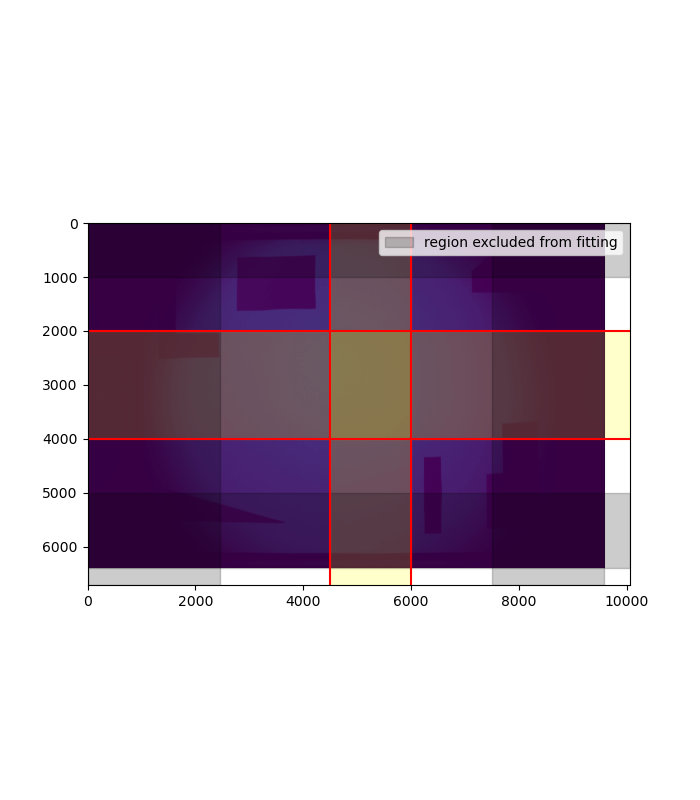

In [51]:
figure = plt.figure(num='visualize image center', figsize=(7, 8))

list_keys = list(images.keys())
image = images[list_keys[0]]
vmin_value = np.min(image)
vmax_value = np.max(image)

axis0 = figure.add_subplot(111)
axis0.clear()
axis0.imshow(images[filename], vmin=vmin, vmax=vmax)
axis0.axhline(y_range[0], color='red', linestyle='-')
axis0.axhline(y_range[1], color='red', linestyle='-')
axis0.axhspan(y_range[0], y_range[1], color='yellow', alpha=.2)

axis0.axvline(x_range[0], color='red', linestyle='-')
axis0.axvline(x_range[1], color='red', linestyle='-')
axis0.axvspan(x_range[0], x_range[1], color='yellow', alpha=.2)

axis0.axvspan(0, x_borders[0], color='black', alpha=.2, label='region excluded from fitting')
axis0.axvspan(x_borders[1], image_width, color='black', alpha=.2)

axis0.axhspan(0, y_borders[0], color='black', alpha=.2)
axis0.axhspan(y_borders[1], image_height, color='black', alpha=.2)

plt.legend()
    

WORK IN PROGRESS

# Profiles to fit 

In [13]:
## INPUT REQUESTED HERE
verti_left = 670
verti_right = 5975

hori_left = 2050
hori_right = 7000

<IPython.core.display.Javascript object>


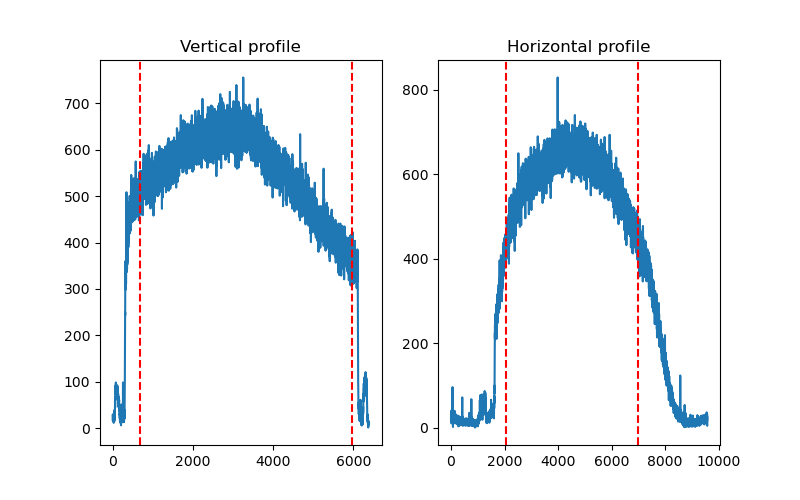

In [14]:
y_profile, x_profile, filename = y, x, filename

figure = plt.figure(num=f"Profiles of {filename}", figsize=(8, 5))

vertical_profile = get_vertical_profile(image=images[filename], x=x_profile)
horizontal_profile = get_horizontal_profile(image=images[filename], y=y_profile)

axis0 = figure.add_subplot(121)
axis0.clear()
axis0.plot(vertical_profile)
axis0.set_title("Vertical profile")   
axis0.axvline(verti_left, color='red', linestyle='--')
axis0.axvline(verti_right, color='red', linestyle='--')

axis1 = figure.add_subplot(122)
axis1.clear()
axis1.plot(horizontal_profile)
axis1.set_title("Horizontal profile")   
axis1.axvline(hori_left, color='red', linestyle='--')
axis1.axvline(hori_right, color='red', linestyle='--')
    

# perform fitting

In [15]:
horizontal_yaxis_to_fit = horizontal_profile[hori_left: hori_right]
horizontal_xaxis = np.arange(hori_left, hori_right)

vertical_yaxis_to_fit = vertical_profile[verti_left: verti_right]
vertical_xaxis = np.arange(verti_left, verti_right)

In [16]:
# we estimate the center position (initial parameter to the fitting algorithm)
estimated_center = {'horizontal': 4456,    # 4456
                    'vertical': 2912}

mod = lmfit.models.GaussianModel() + lmfit.models.ConstantModel()

master_profile_fitted_dict = {}

# fitting vertical profile
pars = mod.make_params(c=vertical_yaxis_to_fit.mean(),
                  center=estimated_center['vertical'],
                  sigma=vertical_xaxis.std(),
                  amplitude=vertical_xaxis.std() * vertical_yaxis_to_fit.ptp())
out1 = mod.fit(vertical_yaxis_to_fit, pars, x=vertical_xaxis)

master_profile_fitted_dict['vertical'] = {'center_value': round(out1.params['center'].value),
                                          'center_error': out1.params['center'].stderr,
                                          'fitting': {
                                                        'yaxis': out1.best_fit,
                                                        'xaxis': vertical_xaxis,
                                                       },
                                            'raw': {
                                                    'xaxis': np.arange(len(vertical_profile)),
                                                    'yaxis': vertical_profile,
                                                   },
                                           }

# fitting horizontal profile
pars = mod.make_params(c=horizontal_yaxis_to_fit.mean(),
                  center=estimated_center['horizontal'],
                  sigma=horizontal_xaxis.std(),
                  amplitude=horizontal_xaxis.std() * horizontal_yaxis_to_fit.ptp())
out = mod.fit(horizontal_yaxis_to_fit, pars, x=horizontal_xaxis)

master_profile_fitted_dict['horizontal'] = {'center_value': round(out.params['center'].value),
                                            'center_error': out.params['center'].stderr,
                                            'fitting': {
                                                        'yaxis': out.best_fit,
                                                        'xaxis': horizontal_xaxis,
                                                       },
                                            'raw': {
                                                    'xaxis': np.arange(len(horizontal_profile)),
                                                    'yaxis': horizontal_profile,
                                                   },
                                           }



# display fitting, fitted center value, theoretical center value

<IPython.core.display.Javascript object>


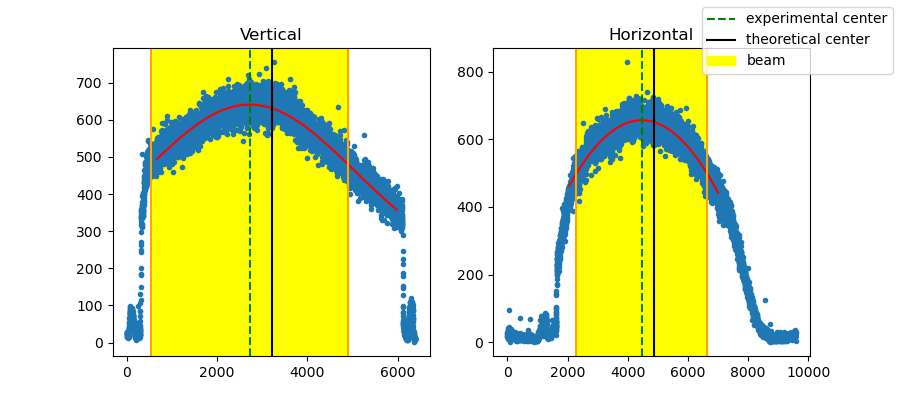

In [17]:
fig, axes = plt.subplots(num='display fitting', figsize=(9,4), nrows=1, ncols=2)

# vertical 
xaxis_fitting = master_profile_fitted_dict['vertical']['fitting']['xaxis']
yaxis_fitting = master_profile_fitted_dict['vertical']['fitting']['yaxis']
xaxis_raw = master_profile_fitted_dict['vertical']['raw']['xaxis']
yaxis_raw = master_profile_fitted_dict['vertical']['raw']['yaxis']
vertical_center_value = master_profile_fitted_dict['vertical']['center_value']
axes[0].plot(xaxis_raw, yaxis_raw, '.')
axes[0].plot(xaxis_fitting, yaxis_fitting, 'r')
axes[0].axvline(vertical_center_value, color='green', linestyle='--', label='experimental center')
axes[0].set_title("Vertical")
axes[0].axvline(theoretical_center_y_px, color='black', linestyle='-', label='theoretical center')

# showing primary beam size
axes[0].axvline(vertical_center_value - beam_radius_px, color='orange')
axes[0].axvline(vertical_center_value + beam_radius_px, color='orange')
axes[0].axvspan(vertical_center_value - beam_radius_px, 
                vertical_center_value + beam_radius_px, color='yellow',
               label='beam')

# horizontal
xaxis_fitting = master_profile_fitted_dict['horizontal']['fitting']['xaxis']
yaxis_fitting = master_profile_fitted_dict['horizontal']['fitting']['yaxis']
xaxis_raw = master_profile_fitted_dict['horizontal']['raw']['xaxis']
yaxis_raw = master_profile_fitted_dict['horizontal']['raw']['yaxis']
horizontal_center_value = master_profile_fitted_dict['horizontal']['center_value']
axes[1].plot(xaxis_raw, yaxis_raw, '.')
axes[1].plot(xaxis_fitting, yaxis_fitting, 'r')
axes[1].axvline(horizontal_center_value, color='green', linestyle='--')
axes[1].set_title("Horizontal")
axes[1].axvline(theoretical_center_x_px, color='black', linestyle='-')

# showing primary beam size
axes[1].axvline(horizontal_center_value - beam_radius_px, color='orange')
axes[1].axvline(horizontal_center_value + beam_radius_px, color='orange')
axes[1].axvspan(horizontal_center_value - beam_radius_px, 
                horizontal_center_value + beam_radius_px, color='yellow')

fig.legend()

<IPython.core.display.Javascript object>


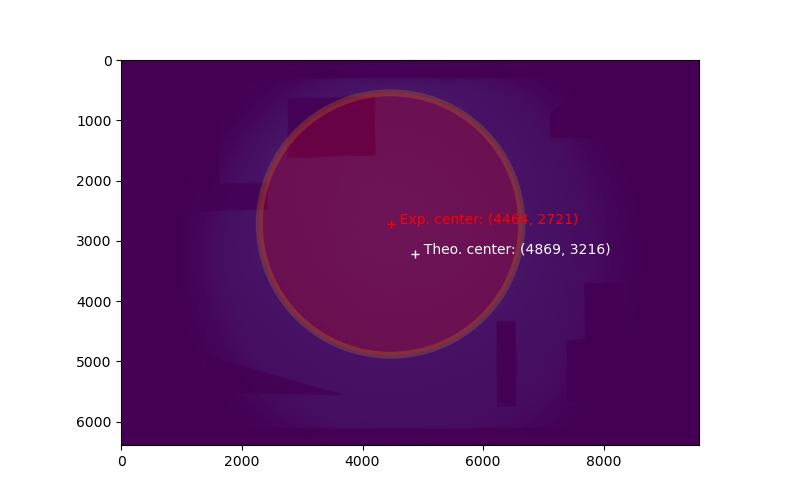

In [20]:
figure = plt.figure(num='visualize beam', figsize=(8, 5))

list_keys = list(images.keys())
image = images[list_keys[0]]
vmin_value = np.min(image)
vmax_value = np.max(image)

axis0 = figure.add_subplot(111)
axis0.clear()
axis0.imshow(images[filename], vmin=vmin, vmax=vmax,
            cmap='viridis')
axis0.plot(horizontal_center_value, vertical_center_value, 'r+')
axis0.text(horizontal_center_value, vertical_center_value,
          f"  Exp. center: ({horizontal_center_value}, {vertical_center_value})", color='red')
axis0.plot(theoretical_center_x_px, theoretical_center_y_px, 'w+')
axis0.text(theoretical_center_x_px, theoretical_center_y_px, 
          f"  Theo. center: ({theoretical_center_x_px}, {theoretical_center_y_px})", color='white')

exp_circle = plt.Circle((horizontal_center_value, vertical_center_value), beam_radius_px, 
                            facecolor='red',
                            lw=5,
                           alpha=0.2,
                           edgecolor='orange',
                            label='theoretical beam')
axis0.add_patch(exp_circle)
